# Examen parcial 3 (calculo numerico y algebra lineal)
* Antes de enviar el archivo, $\textbf{reiniciar y ejecutar el kernel}$ para ver que el archivo se compila sin errores
* enviar el archivo jupyter sin anexos antes de las 10.10am del 30.03.2022 a mi dirección de correo electrónico: michal.hemmerling@udea.edu.co 

In [1]:
#JOSE LUIS TORRES CC: 1010001242


from scipy.integrate import solve_bvp
import numpy as np
import random  
import numpy as np      #LIBRERIAS
import matplotlib.pyplot as plt  
import pandas as pd
import random as rd
from scipy.optimize import curve_fit as CF 
import time 
from scipy import optimize
from scipy.misc import derivative as dv
import sympy as sym
import scipy
from scipy.interpolate import interp1d
from scipy.integrate import quad as qq
from scipy.integrate import solve_ivp as SS
from scipy.integrate import odeint as OO
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
import numpy as np

# Ejercicio 1

El archivo $\textbf{data_radius_density.csv}$ contiene dos columnas: radio ($ r $) y la densidad ($ \rho (r) $) de un disco plano en función del radio

El disco es lo suficientemente delgado como para que, con fines matemáticos, podamos tratarlo como un objeto bidimensional. Asumimos que la densidad se da en términos de masa por unidad de área (llamada densidad de área), y además asumimos que la densidad varía solo a lo largo del radio del disco (llamada densidad radial). Orientamos el disco en el plano xy, con el centro en el origen. Entonces, la densidad del disco puede ser tratada como una función de x, denotada $\rho(x)$.
<table><tr>
<td> <img src="disk_radius_density.png" width="500" /> </td>
</tr></table>   

* a) importar los datos usando Pandas, graficar la densidad del disco frente a su radio (los gráficos deben tener etiquetas para el eje `x` y el eje `y`).

* b) sabiendo que la masa del disco viene dada por una integral:
$$ m = \int_0^{r} 2 \pi \ r * \rho (r) \ dr $$
     calcular la masa del disco mediante integración numérica

* Pista:`x`: is radius and `y`: is ***integrand***


In [2]:
df=pd.read_csv("/content/data_radius_density.csv")
df

,radius,density
0,0.000000,0.000000
1,0.040404,0.201008
2,0.080808,0.284268
3,0.121212,0.348155
4,0.161616,0.402015
...,...,...
95,3.838384,1.959179
96,3.878788,1.969464
97,3.919192,1.979695
98,3.959596,1.989873


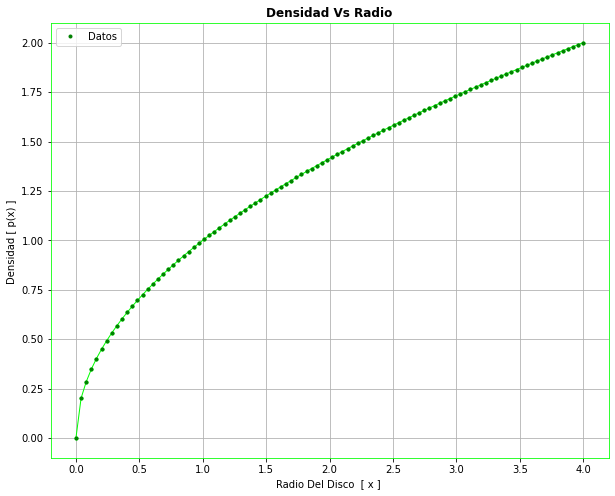

In [3]:
#GRAFICA

fig = plt.figure(figsize = (10,8))
#fig,ax = plt.subplots(1,1)

plt.plot(df.radius,df.density,".-",color="lime",label='',lw=1)
plt.plot(df.radius,df.density,".",color="g",label='Datos',lw=1)



plt.title("Densidad Vs Radio", loc = "center", fontdict = {'fontsize':12, 'fontweight':'bold'})
plt.ylabel("Densidad [ p(x) ] ")
plt.xlabel("Radio Del Disco  [ x ] ")

#MARCO
P= plt.gca()
C="lime"
P.spines['right'].set_color(C) 
P.spines['top'].set_color(C)
P.spines['bottom'].set_color(C) 
P.spines['left'].set_color(C) 
plt.legend(loc="best")
plt.grid() 
plt.show()

In [4]:
# PISTAS

x=df.radius #X
y=df.density
#Integrand
def Int(x,y):
  M = ( 2 * np.pi * (x*y) )
  return M
  
Integral = scipy.integrate.simps(Int(x,y),x)
print("la masa del disco es = ",round(Integral,7)," Kg")

la masa del disco es =  80.4248977  Kg


# Ejercicio 2

La capacidad calorífica de un gas muy frío se puede aproximar mediante:

$$ C_v \approx \left (\frac{dP}{dT} \right) $$
(en las unidades de $ \left [\frac {J} {K} \right] $)

Donde $P$ es la presión $ [J / s^3] $ del gas y $ T \ [K] $ es la temperatura del gas.

Los datos para la presión frente a la temperatura se dan en el archivo csv ($ \textbf{data_pressure_vs_temperature.csv} $).

* a) importar los datos usando pandas
* b) hacer un gráfico de $P$ vs $T$ (grafico tiene que tener etiquietas)
* c) utilizando la derivada numérica, encuentre la capacidad calorífica.
* d) hacer un gráfico de $C_v$ vs $T$ (grafico tiene que tener etiquietas)
* e) usando el ultimo grafico hace una estimacion de Temperatura Critica de este gas (Temperatura Critica es Temperatura de cambio abrupto del comportamiento de Capacidad Termica)

*gas muy frío se refiere a un gas Bose no homogéneo, y la teoría que relaciona $ C_v $ y $ P $ se refiere a la Teoría de Variables Globales Termodinámicas. La presión en realidad se llama parámetro de presión.

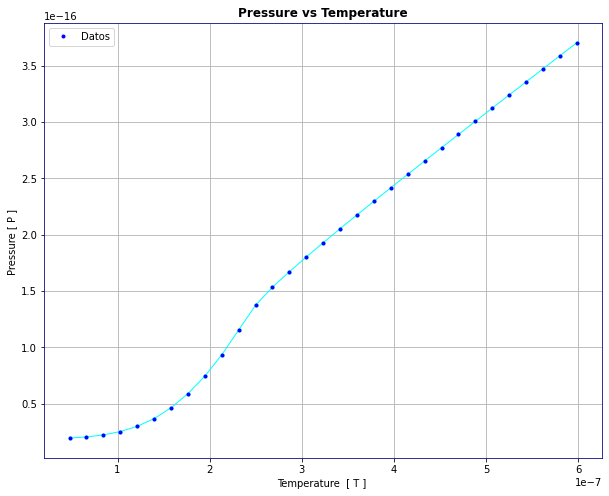

In [5]:
dff=pd.read_csv("/content/data_pressure_vs_temparature.csv") #Importacion  de Datos

#GRAFICA P vs T

fig = plt.figure(figsize = (10,8))
#fig,ax = plt.subplots(1,1)

plt.plot(dff.Temperature,dff.Pressure,".-",color="cyan",label='',lw=1)
plt.plot(dff.Temperature,dff.Pressure,".",color="b",label='Datos',lw=1)




plt.title('Pressure vs Temperature', loc = "center", fontdict = {'fontsize':12, 'fontweight':'bold'})
plt.ylabel("Pressure [ P ] ")
plt.xlabel("Temperature  [ T ] ")

#MARCO
P= plt.gca()
C="navy"
P.spines['right'].set_color(C) 
P.spines['top'].set_color(C)
P.spines['bottom'].set_color(C) 
P.spines['left'].set_color(C) 
plt.legend(loc="best")
plt.grid() 
plt.show()


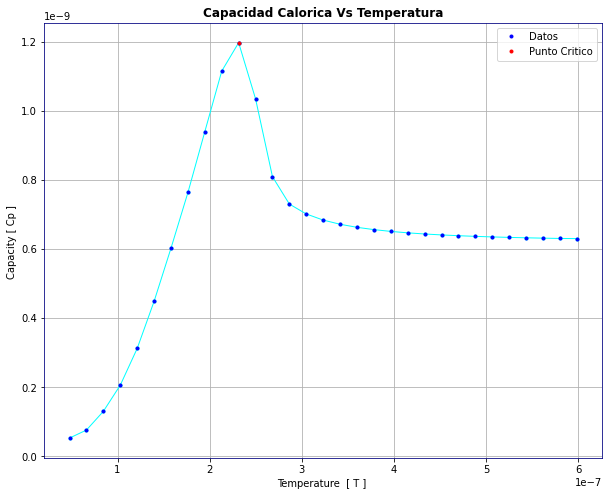

In [6]:
#Derivacion Numerica

y_prime = np.gradient(dff.Pressure, dff.Temperature)

#GRAFICA Cp vs T

fig = plt.figure(figsize = (10,8))
#fig,ax = plt.subplots(1,1)

plt.plot(dff.Temperature,y_prime,".-",color="cyan",label='',lw=1)
plt.plot(dff.Temperature,y_prime,".",color="b",label='Datos',lw=1)
plt.plot(dff.Temperature[10],y_prime[10],".",color="r",label='Punto Critico',lw=1)




plt.title('Capacidad Calorica Vs Temperatura', loc = "center", fontdict = {'fontsize':12, 'fontweight':'bold'})
plt.ylabel("Capacity [ Cp ] ")
plt.xlabel("Temperature  [ T ] ")

#MARCO
P= plt.gca()
C="navy"
P.spines['right'].set_color(C) 
P.spines['top'].set_color(C)
P.spines['bottom'].set_color(C) 
P.spines['left'].set_color(C) 
plt.legend(loc="best")
plt.grid() 
plt.show()

In [7]:
print(f"La capacidad calorica alcanza un pico en:  {y_prime[10]}  ")
print()
print(f"cuando la temperatura es {dff.Temperature[10]} ")

La capacidad calorica alcanza un pico en:  1.1976979318858835e-09  

cuando la temperatura es 2.3147805092375505e-07 


# Ejercicio 3

Dada es Matrix $S$:

$$S=
\begin{bmatrix}
1 &  -1 & -1 & -1\\
-1 &  2 & 0 & 0\\
-1 &  3 & 3 & 0 \\
-1 &  0 & 1 & 4 \\
\end{bmatrix}$$


a) calcular $S^5$ utilizando diagonalización.  

b) crear una funcion `matrix_power(A,n)` que recive dos parametros: matrix $A$, y valor entero de la potencia $n$. Funcion tiene que devolver una matrix $M=A^n$ (usa diagonalizacion)

In [8]:
#Se define la MATRIZ a estudiar

A=np.array([[1,-1,-1,-1],
            [-1,2,0,0],
            [-1,3,3,0],
            [-1,0,1,4]])


#Diagonalizacion

evalues,evectors=np.linalg.eig(A) # Valores y vectores propios de la matriz (numpy)

P = evectors #MATRIZ AutoVectores
D = np.diag(evalues) #MATRIZ Diagonal
P_1 = np.linalg.inv(evectors) #MATRIZ "Inversa"

D5=D**5 #Entradas de diagonal elevadas a la quinta potencia


POT = np.matmul(P,np.matmul(D5,P_1)) #Calculo por diagonalizacion
pot = np.linalg.matrix_power(A, 5) #Calculo por numpy



#Utilizamos una adecuada visualizacion para los datos  encontrados
print("La potencia calculada con diagonalizacion es :\n",POT)
print('')
print("")
print("La potencia calculada con numpy es :\n",pot)


La potencia calculada con diagonalizacion es :
 [[  485.  -755.  -563.  -563.]
 [ -179.   280.   192.   192.]
 [ -675.  1201.   707.   464.]
 [-1027.  1448.  1275.  1518.]]


La potencia calculada con numpy es :
 [[  485  -755  -563  -563]
 [ -179   280   192   192]
 [ -675  1201   707   464]
 [-1027  1448  1275  1518]]


In [9]:
#Funcion pedida

def matrix_power(A,n):

  evalues, evectors = np.linalg.eig(A) #Diagonalizacion

 #DATOS
  P = evectors
  D = np.diag(evalues)
  P1 = np.linalg.inv(P)

  Dn=D**n #Potencia buscada 

  OP = np.matmul(P,np.matmul(Dn,P1))
  return OP


In [10]:
matrix_power(A,5)

array([[  485.,  -755.,  -563.,  -563.],
       [ -179.,   280.,   192.,   192.],
       [ -675.,  1201.,   707.,   464.],
       [-1027.,  1448.,  1275.,  1518.]])